# IMAGE CLASSIFICATION

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Image_size = 256
Batch_size = 32
Channels = 3
Epochs = 15

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    seed=123,
    shuffle=True,
    image_size=(Image_size, Image_size),
    batch_size=Batch_size
)

Found 336 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names = class_names
class_names

['Chris Hemsworth',
 'Elizabeth Olsen',
 'Mark Ruffalo',
 'Robert Downey',
 'Scarlett Johansson']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[3 2 0 4 0 3 4 2 4 3 2 4 2 4 1 3 3 2 3 4 4 4 4 3 0 4 1 0 0 0 3 0]


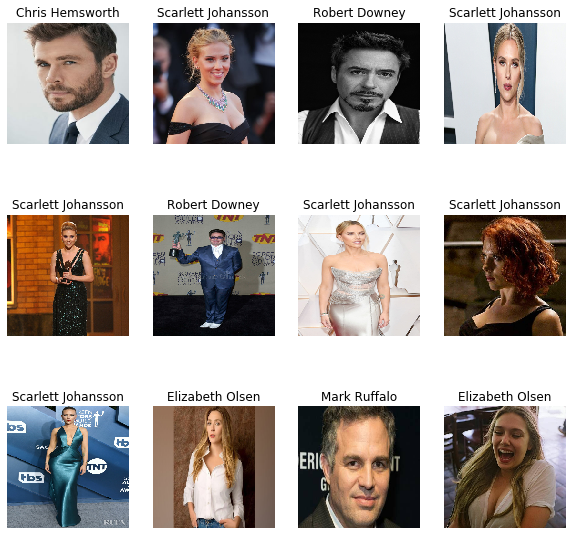

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(Image_size, Image_size),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
input_shape = (Batch_size, Image_size, Image_size, Channels)
n_classes = 5

model = tf.keras.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=Epochs,
)

Epoch 1/15
8/8 [==============================] - 15s 2s/step - loss: 1.6109 - accuracy: 0.2227 - val_loss: 1.6186 - val_accuracy: 0.2500
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 1.5880 - accuracy: 0.2695 - val_loss: 1.6145 - val_accuracy: 0.2500
Epoch 3/15
8/8 [==============================] - 13s 2s/step - loss: 1.5859 - accuracy: 0.2734 - val_loss: 1.6079 - val_accuracy: 0.2500
Epoch 4/15
8/8 [==============================] - 13s 2s/step - loss: 1.5817 - accuracy: 0.2734 - val_loss: 1.6146 - val_accuracy: 0.2500
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 1.5820 - accuracy: 0.2734 - val_loss: 1.6032 - val_accuracy: 0.2500
Epoch 6/15
8/8 [==============================] - 12s 2s/step - loss: 1.5802 - accuracy: 0.2734 - val_loss: 1.6096 - val_accuracy: 0.2500
Epoch 7/15
8/8 [==============================] - 12s 1s/step - loss: 1.5663 - accuracy: 0.3008 - val_loss: 1.6222 - val_accuracy: 0.3125
Epoch 8/15
8/8 [==================

In [16]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 1s 322ms/step - loss: 1.5121 - accuracy: 0.3125


first image to predict
actual label: Elizabeth Olsen
predicted label: Scarlett Johansson


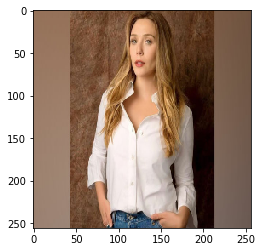

In [24]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class

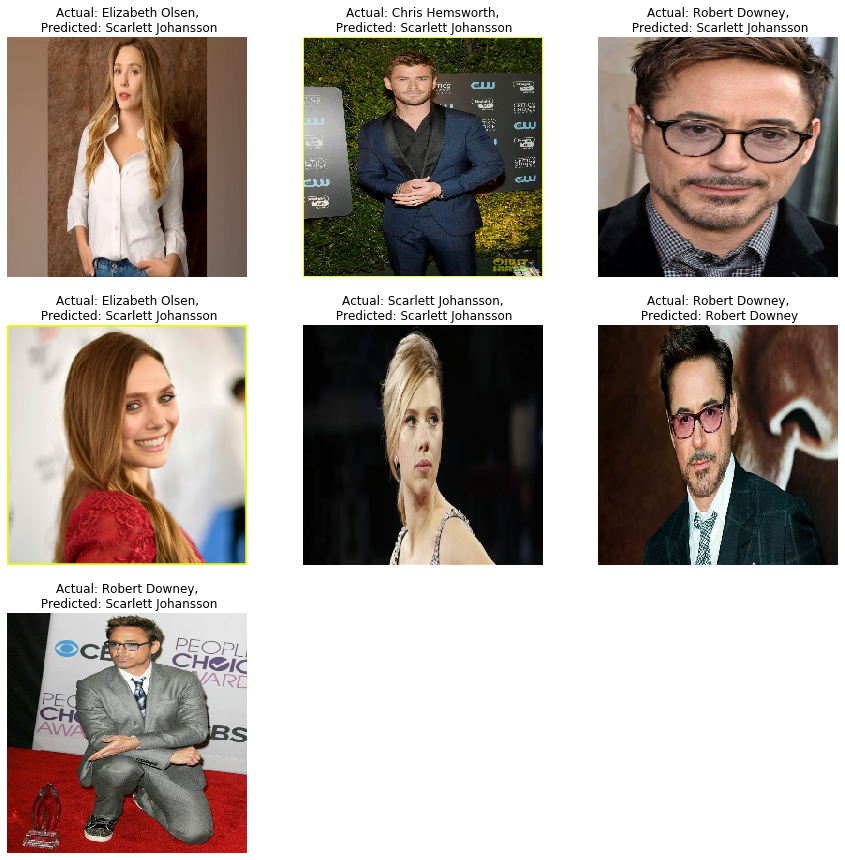

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(7):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")